<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

# **SC13x** 

# **Linear Algebra**

## **Part 1. Linear Algebra**

In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### **1-1. 벡터의 내적**

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

</br>

- $\vec{c} \cdot \vec{d}$ 를 구해보세요. 
- 이 두 개의 vector가 orthogonal 관계 (직교)에 있는지 확인해보세요.

In [ ]:
c = np.array([3,7,-2,12])
d = np.array([9,-7,4,6])
np.dot(c,d)

42

##### **Q1. 두 벡터 c, d가 orthogonal 관계(직교)에 있다면 왜 그런지, 아니라면 왜 아닌지 쓰세요.**

**내적이 0이 아니므로 orthogonal 관계가 아닙니다.**

### **1-2. 행렬의 연산**


\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

</br>

- $E^{-1}$, $E^T$을 구하세요.





##### **Q2. $E^{-1}$의 첫번째 row의 합을 반올림하여 소수점 둘째 자리까지 구한 값과 $E^T$의 첫번째 row의 합을 튜플 형태로 쓰세요. ex) (0.12, 22)** 

In [ ]:
E = np.array([[7,4,2],[1,3,-1],[2,6,-4]])
E_inv = np.linalg.inv(E)
E_T = E.T
E_inv,E_T
round(sum(E_inv[0]),2),round(sum(E_T[0]),2)

(-0.35, 10)

### **1-3. Determinant**

행렬 $F$ 를 활용하여 다음 `Q3` 질문에 답해봅니다.

</br>

\begin{align}
F = 
\begin{bmatrix}
    2 & -2 & 5 \\
    4 & 1 & 10 \\
    12 & 6 & 30
\end{bmatrix}
\end{align}



 



##### **Q3. $det(F)$ 값을 바탕으로 행렬 $F$ 에는 어떤 의미가 있는지 쓰세요.**

In [ ]:
F = np.array([[2,-2,5],[4,1,10],[12,6,30]])
np.linalg.det(F)

0.0

**행렬식이  0이라서 역행렬이 존재하지 않습니다**

## **Part 2. PCA**

### **2-1. Covariance & Correlation**

- 다음 표를 보고 `S&P 500`과 `ABC Corp.`의 공분산과 상관계수를 구하세요.

  <img src='https://i.imgur.com/QBCt8yx.png' width=500>

##### **Q4. 공분산과 상관계수를 각각 반올림하여 소수점 둘째 자리까지 구한 후, (공분산, 상관계수)의 형태로 쓰세요.** 

In [ ]:
sp_500 = np.array([1692,1978,1884,2151,2519])
abc_corp = np.array([68,102,110,112,154])
cov = np.cov(sp_500,abc_corp)[0,1]
corr = np.corrcoef(sp_500,abc_corp)[0,1]

round(cov,2),round(corr,2)

(9107.3, 0.95)

### **2-2. PCA**




In [ ]:
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

df

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


#### **2-2-a. 데이터 표준화** 

- `Country` column을 `country` 라는 변수에 저장하세요.
- 다음 [링크](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)를 참고하여 `df`의 numerical columns에 대해 표준화를 진행하세요.




In [ ]:
country = df['Country']
df = df.drop(columns='Country',axis=1)
country

0          England
1            Wales
2         Scotland
3    North Ireland
Name: Country, dtype: object

In [ ]:
scaler = StandardScaler()
Z = scaler.fit_transform(df)
Z

array([[ 0.65827466, -0.01749546, -0.25954622,  0.64458535, -0.63242919,
         0.13055067, -0.45007561,  0.86331183,  0.37773603, -0.33626508,
         0.80547723,  0.73740709, -0.64432226, -0.05191741, -0.43523112,
         0.10499766, -0.13830319],
       [ 0.53580495, -1.27716878,  1.19885635,  1.15244047,  1.53589947,
         1.54795798,  0.43569619,  1.09352832,  1.40168163,  0.08406627,
         1.17160324,  0.9292974 ,  1.67946294,  1.60943981, -1.40423624,
         0.84182336,  0.96812236],
       [ 0.53580495, -0.22744102,  0.54381113, -0.33205912, -1.09707105,
        -0.54085279, -1.33584741, -0.70983418, -0.49636387,  1.51319287,
        -0.87870243, -0.0575671 , -0.85557546, -0.46725672,  1.19072664,
         0.71656299,  0.74683725],
       [-1.72988456,  1.52210526, -1.48312126, -1.4649667 ,  0.19360077,
        -1.13765587,  1.35022682, -1.24700598, -1.28305378, -1.26099406,
        -1.09837804, -1.60913739, -0.17956522, -1.09026568,  0.64874072,
        -1.66338402

##### **Q5. 표준화 한 후, `Sugars` column의 index가 0인 값을 반올림하여 소수점 둘째 자리까지 구하세요.**

In [ ]:
sugars = df['Sugars']

mean = sugars.mean()
std = sugars.std()

result = (sugars - mean) / std

round(result[0],2)

0.11

#### **2-2-b. PCA**

표준화를 진행한 `df`에 sklearn의 PCA를 적용한 후 `scatterplot`을 그려봅니다.
- PCA 결과를 `pca_df`라는 이름의 데이터프레임으로 저장하세요.
  - PC의 개수는 2개 ~ 4개 사이로 지정하세요.
  - 각 column의 이름은 `PC1`, `PC2`...로 설정하세요.
- scatterplot의 x축에 `PC1`, y축에 `PC2`이 나타나도록 하세요.
- scatterplot의 hue 파라미터를 `country`로 지정하세요. 

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

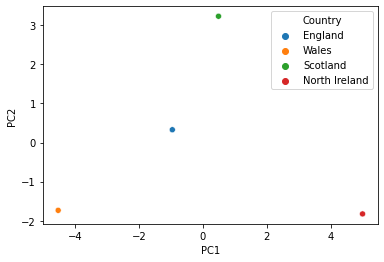

In [ ]:
pca = PCA(n_components=2)
B = pca.fit_transform(Z)
pca_df = pd.DataFrame(B, columns=['PC1', 'PC2'])
sns.scatterplot(x='PC1', y='PC2', hue=country, data=pca_df)

##### **Q6. `scatterplot`의 가장 왼쪽에 위치하고 있는 나라는 어디인가요?**

**`Wales`**

## **Part 3. Clustering**

### **3-1. K-Means Clustering**

아래 데이터에 대해 sklearn의 K-Means Clustering을 적용한 후, 그 결과를 seaborn 라이브러리의 `scatterplot`으로 시각화하세요.
- `n_clusters = 4`, `random_state = 42`를 제외한 다른 parameter는 default option을 사용합니다.
- `scatterplot`의 hue 파라미터를 설정하여, cluster 별로 데이터가 어디에 위치해 있는지 확인합니다.
  - x축에는 `x`, y축에는 `y` column을 지정합니다.


In [ ]:
points = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/sc13x/data.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [ ]:
#표준화
scaler = StandardScaler()
Z = scaler.fit_transform(points)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

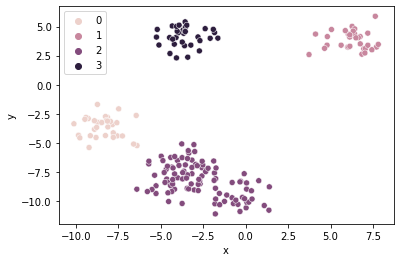

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(Z)

sns.scatterplot(x='x', y='y', hue=kmeans.labels_, data=points)

##### **Q7. scatterplot에서 가장 우측 상단에 위치해 있는 cluster는 무엇인가요?**

**`1번 cluster`**

## **Part 4. 도전 과제**

위에서 요구된 사항들을 모두 정확하게 만족하였으며, 아래 **2개의 추가 조건들 중 하나**를 만족하는 경우 3점을 얻을 수 있습니다.

아래 요구사항들은 모두 **optional** 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)



### **4-1. Scree plot** 




#### **`2-2-b.`에서 진행한 PCA 결과에 대해서 `Scree plot`을 추가하세요.**

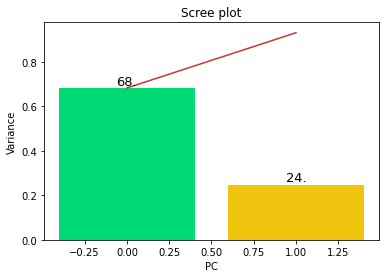

In [ ]:
# scree plot으로 나타내는 함수 정의 
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
  
scree_plot(pca)

##### **Q8. PC1이 포함하고 있는 variance의 비율을 반올림하여 소수점 둘째 자리까지 구하세요.**

In [ ]:
round(pca.explained_variance_ratio_[0], 2)

0.68

### **4-2. Elbow Methods**



##### **Q9. Elbow Methods를 활용하여 `Part 3. Clustering`에서 최적의 k값을 선택하는 과정을 논리적으로 설명하세요.**


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

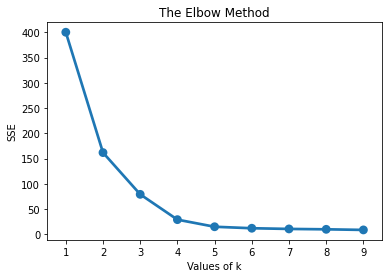

In [ ]:
sse = {}

for k in range(1,10):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(Z)
  sse[k] = kmeans.inertia_


# 결과 시각화
plt.title('The Elbow Method')
plt.xlabel('Values of k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show();

In [ ]:
# 패키지 준비
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
x = Z
for n_clusters in range(2,7):
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.599229895905887


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.6226554528841287
For n_clusters = 4 The average silhouette_score is : 0.699980283409592


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.6605994080479519
For n_clusters = 6 The average silhouette_score is : 0.6004404357137763


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**`우선 Elbow Methods를 보면 3번과 4번이 애매합니다 그래서 저는 실루엣점수를 봤고 실루엣 점수는 3,4 전부 0.5의 실루엣 점수를 넘기므로 다 괜찮지만 가장 큰 실루엣 점수인 4개의 클러스터로 하는 것이 좋아 보입니다`**
